First make sure to :

## Get Started quickly 
git clone https://github.com/Qredence/GraphFleet.git


cd GraphFleet
poetry shell
poetry install


## Batch import your PDF right from this notebook ! 
Run the script below, an "Upload" button should have appeared, click on it and add your pdfs, it will automaticly convert and add them in a .txt in the right folder.

In [1]:
### Import libraries
import os
from PyPDF2 import PdfReader
import ipywidgets as widgets
from IPython.display import display, clear_output

### Define the directory to save the .txt files
txt_directory = '../graphfleet/input'
if not os.path.exists(txt_directory):
    os.makedirs(txt_directory)

# Create upload button
uploader = widgets.FileUpload(
    accept='.pdf',  # Accept only PDF files
    multiple=True   # Allow uploading multiple files
)

### Create output area
output = widgets.Output()

### Conversion function
def convert_pdfs(change):
    with output:
        clear_output()  # Clear previous output

        uploaded_files = change['new']
        if uploaded_files:
            # Correctly handle uploaded_files as a tuple
            for uploaded_info in uploaded_files:
                uploaded_file_name = uploaded_info.name
                content = uploaded_info.content

                # Save the uploaded PDF temporarily 
                temp_pdf_path = uploaded_file_name
                with open(temp_pdf_path, 'wb') as f:
                    f.write(content)

                # Define output .txt filename within txt_directory
                txt_filename = os.path.join(txt_directory, uploaded_file_name.replace(".pdf", ".txt"))

                # Convert the PDF to text
                convert_pdf_to_txt(temp_pdf_path, txt_filename)
                print(f"Converted {uploaded_file_name} to {txt_filename}")

                # (Optional) Remove the temporary PDF file
                os.remove(temp_pdf_path) 

## Function to convert PDF to text (no changes needed)
def convert_pdf_to_txt(pdf_path, txt_path):
    with open(pdf_path, 'rb') as pdf_file:
        reader = PdfReader(pdf_file)
        text = ''
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    with open(txt_path, 'w', encoding='utf-8') as txt_file:
        txt_file.write(text)

## Observe changes in the upload widget
uploader.observe(convert_pdfs, names='value')

# Display the upload button and output area
display(uploader)
display(output)





FileUpload(value=(), accept='.pdf', description='Upload', multiple=True)

Output()

### Great! Now that your PDF is formatted correctly and in the right location (graphfleet/input), we can initialize your workspace. Just execute the following command to get started:

In [2]:
! python -m graphrag.index --init --root ../graphfleet

/Users/zocho/Library/Caches/pypoetry/virtualenvs/graphfleet-bVb82vZ5-py3.12/lib/python3.12/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/Users/zocho/Library/Caches/pypoetry/virtualenvs/graphfleet-bVb82vZ5-py3.12/lib/python3.12/site-packages/paramiko/transport.py:259: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
Initializing project at ../graphfleet
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File Indexer 
"/Users/zocho/Library/Caches/pypoetry/virtualenvs/graphfleet-bVb82vZ5-py3.12/lib
/python3.12/site-packages/graphrag/index/__main__.py", line 76, in 

## Setting Up Your GraphRAG Pipeline

## This notebook guides you through configuring your GraphRAG pipeline using either OpenAI or Azure OpenAI.

# ## 1. Environment Variables and Settings Files

# GraphRAG relies on two crucial files for configuration:

# - **.env:** This file stores environment variables. The most important one is `GRAPHRAG_API_KEY`, which holds your API key for either OpenAI or Azure OpenAI. 
# - **settings.yaml:** This file contains settings that fine-tune the behavior of the GraphRAG pipeline. 

## Here's a breakdown of how to configure each file for OpenAI and Azure OpenAI:

 ## 2. OpenAI Configuration

# 1. **Update `.env`:**
#    - Open the `.env` file located in your `./ragtest` directory.
#    - Find the line `GRAPHRAG_API_KEY=<API_KEY>`.
#    - Replace `<API_KEY>` with your actual OpenAI API key. 

# 2. **(Optional) Customize `settings.yaml`:**
#    - Open the `settings.yaml` file in the same directory.
#    - You can customize various aspects of the pipeline here, like which language model to use or how many results to return. Refer to the [configuration documentation](link-to-configuration-docs) for detailed options.

 ## 3. Azure OpenAI Configuration

# 1. **Update `.env`:**
#    - Open the `.env` file.
#    - Set the `GRAPHRAG_API_KEY` to your Azure OpenAI API key.

# 2. **Configure `settings.yaml`:**
#    - Open the `settings.yaml` file.
#    - Search for the `llm` configuration section. You'll find two: one for chat and one for embeddings.
#    - **Chat Endpoint Example:**
#      ```yaml
#      llm:
#        type: azure_openai_chat 
#        api_base: https://<your-instance>.openai.azure.com 
#        api_version: 2024-02-15-preview  # Adjust if needed
#        deployment_name: <your-azure-model-deployment-name> 
#      ```
#    - **Embeddings Endpoint Example:** 
#      ```yaml
#      llm:
#        type: azure_openai_embedding
#        api_base: https://<your-instance>.openai.azure.com 
#        api_version: 2024-02-15-preview  # Adjust if needed
#        deployment_name: <your-azure-model-deployment-name> 
#      ```
#    - **Replace the placeholders:**
#       - `<your-instance>`: Your Azure OpenAI instance name.
#       - `<your-azure-model-deployment-name>`: The deployment name of your Azure OpenAI model.

# ## 4. Next Steps

# - **Initialization:**  Learn how to initialize your GraphRAG pipeline: [Initialization documentation](link-to-initialization-docs).
# - **CLI Usage:** Explore the command-line interface for interacting with GraphRAG: [CLI documentation](link-to-cli-docs). 



## Indexing Your Data:
# Now, let's index your data to make it searchable. This is the final step!


In [3]:
! python -m graphrag.index --root ../graphfleet

/Users/zocho/Library/Caches/pypoetry/virtualenvs/graphfleet-bVb82vZ5-py3.12/lib/python3.12/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/Users/zocho/Library/Caches/pypoetry/virtualenvs/graphfleet-bVb82vZ5-py3.12/lib/python3.12/site-packages/paramiko/transport.py:259: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
🚀 Reading settings from ../graphfleet/settings.yaml
⠹ GraphRAG Indexer 
⠹ GraphRAG Indexer e.text) - 2 files loaded (2 filtered) ━ 100% … 0…
├── Loading Input (InputFileType.text) - 2 files loaded (2 filtered) ━ 100% … 0…
⠹ GraphRAG Indexer 
├── Loading Input (InputFileType.text) - 2 files loaded (2 filtered) ━ 100% … 0…
⠹ GraphRAG Indexer 

## Indexing in Progress!

Running the indexing pipeline might take a while – don't worry, that's normal! ⏳ 
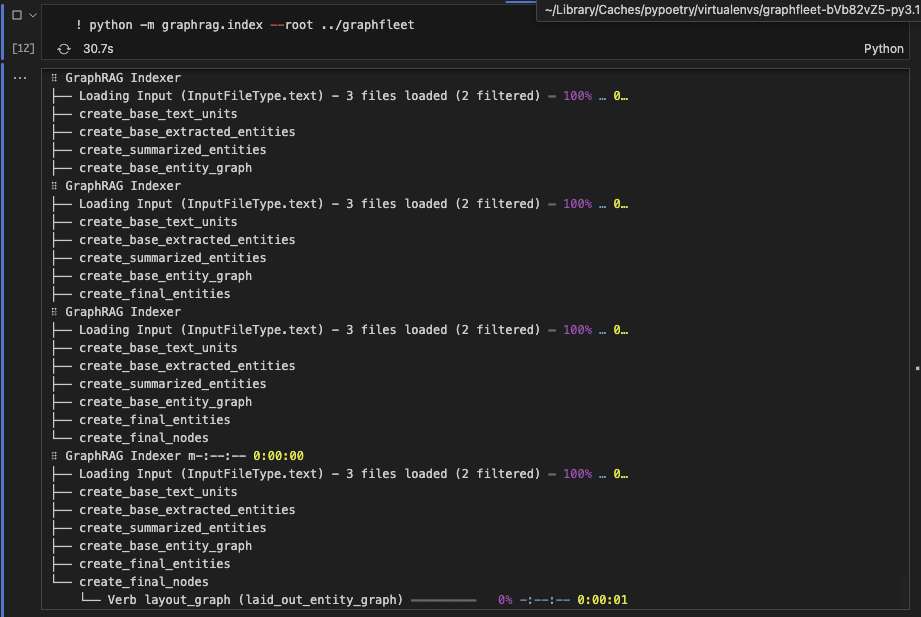
**Factors that influence indexing time:**

* **Size of your data:**  Larger datasets naturally take longer to process.
* **Model selection:** Different models have varying processing speeds.
* **Text chunk size:** This setting (configurable in your `.env` file) impacts how the data is broken down and indexed.

**What to expect:**

Once the indexing process is complete, you'll find a new folder in your project directory:

   `./graphfleet/output/<timestamp>/artifacts` 

Inside this folder, you'll see a collection of `parquet` files. These files contain your indexed data, ready for GraphRAG to use! 


## Time to Query! 🚀

Now that your data is indexed, the real fun begins: **asking questions!**  

Let's explore how to use GraphRAG's query engine to extract insights from your dataset. 

### Global Search: Uncovering High-Level Themes

Use global search to get a bird's-eye view of the main ideas in your data:


In [5]:
! python -m graphrag.query \
--root ../graphfleet \
--method global \
"Why should I use GraphRAG over other kind of solution for my company  ?" 

/Users/zocho/Library/Caches/pypoetry/virtualenvs/graphfleet-bVb82vZ5-py3.12/lib/python3.12/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/Users/zocho/Library/Caches/pypoetry/virtualenvs/graphfleet-bVb82vZ5-py3.12/lib/python3.12/site-packages/paramiko/transport.py:259: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


INFO: Reading settings from ../graphfleet/settings.yaml
creating llm client with {'api_key': 'REDACTED,len=32', 'type': "azure_openai_chat", 'model': '="gpt-4o"', 'max_tokens': 4000, 'temperature': 0.0, 'top_p': 1.0, 'n': 1, 'request_timeout': 180.0, 'api_base': 'https://swedenai090534642465.openai.azure.com', 'api_version': '2024-02-15-p

## Explanation:

python -m graphrag.query: Runs the GraphRAG query engine.
--root ./graphfleet: Specifies the root directory of your GraphRAG project.
--method global: Tells GraphRAG to perform a global search across all your data.
"What are the top themes in this story?": Your natural language query.


In [18]:
! python -m graphrag.query --root ../graphfleet --method local "What is the main features of GraphRAG  ?" 




INFO: Reading settings from ../graphfleet/settings.yaml
creating llm client with {'api_key': 'REDACTED,len=32', 'type': "azure_openai_chat", 'model': '="gpt-4o"', 'max_tokens': 4000, 'request_timeout': 180.0, 'api_base': 'https://swedenai090534642465.openai.azure.com', 'api_version': '2024-02-15-preview', 'organization': None, 'proxy': None, 'cognitive_services_endpoint': None, 'deployment_name': 'gpt-4o', 'model_supports_json': True, 'tokens_per_minute': 0, 'requests_per_minute': 0, 'max_retries': 6, 'max_retry_wait': 5.0, 'sleep_on_rate_limit_recommendation': True, 'concurrent_requests': 25}
creating embedding llm client with {'api_key': 'REDACTED,len=32', 'type': "azure_openai_embedding", 'model': 'text-embedding-3-large', 'max_tokens': 4000, 'request_timeout': 180.0, 'api_base': 'https://swedenai090534642465.openai.azure.com', 'api_version': '2024-02-15-preview', 'organization': None, 'proxy': None, 'cognitive_services_endpoint': None, 'deployment_name': 'text-embedding-3-large',

## Explanation:

--method local: Instructs GraphRAG to focus on a specific part of your data relevant to the query.
"Who is Scrooge, and what are his main relationships?": This query focuses on a character (Scrooge) and their relationships.

## Experiment! 🧪

Go ahead and ask your own questions! Try different query types, phrasings, and explore the power of GraphRAG to unlock insights from your indexed data.